In [1]:
import pandas as pd
df = pd.read_csv("./1_boston_housing.csv")

In [2]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\Anand Dwivedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.10, verbose = 1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 528.4473 - mae: 21.2590 - val_loss: 475.4246 - val_mae: 22.3626
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 531.9172 - mae: 20.9353 - val_loss: 412.4705 - val_mae: 20.8066
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 448.6886 - mae: 18.8927 - val_loss: 330.6804 - val_mae: 18.4993
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 373.9436 - mae: 16.6996 - val_loss: 232.8126 - val_mae: 15.0725
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 288.4963 - mae: 13.7127 - val_loss: 147.2076 - val_mae: 11.1375
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.2937 - mae: 10.4232 - val_loss: 116.5891 - val_mae: 8.6964
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141.5612 - mae: 9.3459 - val_loss: 118.2160 - val_mae: 8.0312
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 121.0863 - mae: 8.4457 - val_loss: 104.8994 - val_mae: 7.6219
Epoch 9/50
10/10 ━━━━━━━━━━━

In [6]:
y_train.mean(), y_test.mean()

(MEDV    22.761864
 dtype: float64,
 MEDV    21.999342
 dtype: float64)

In [7]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33.3500 - mae: 3.7291 
Mean squared error on test data:  26.2944393157959
Mean absolute error on test data:  3.3813588619232178


<Axes: title={'center': 'loss Curves'}, xlabel='Epochs', ylabel='Loss'>

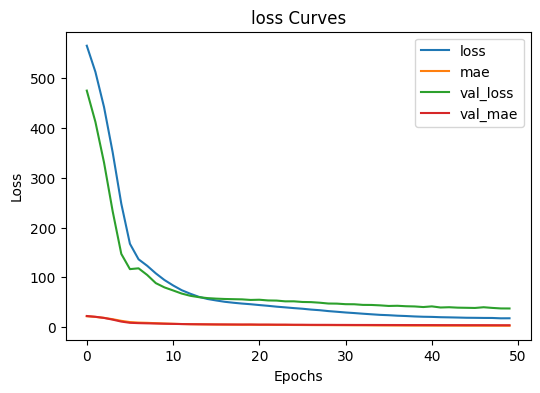

In [8]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel="Epochs", ylabel="Loss", title="loss Curves")

In [9]:
y_pred = model.predict(X_test)
y_pred[0]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([10.996199], dtype=float32)